In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [6]:
digits=load_digits()

In [7]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
digits.data[0] #this is actually the array representation of an 8x8 image, so there are 64 elements

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

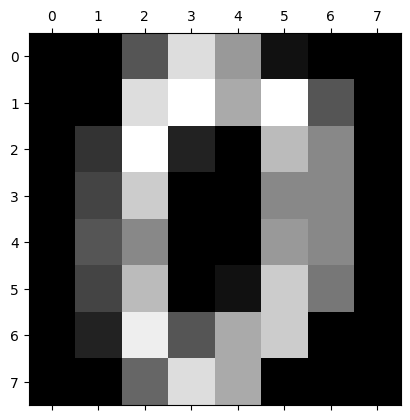

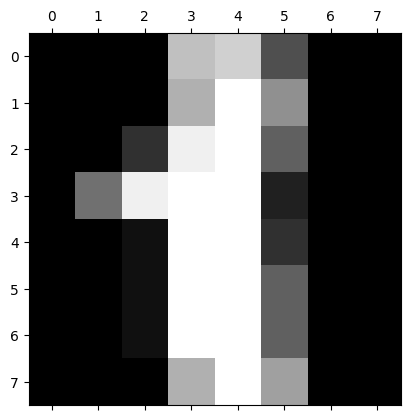

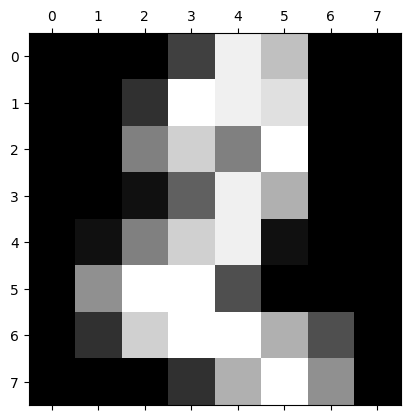

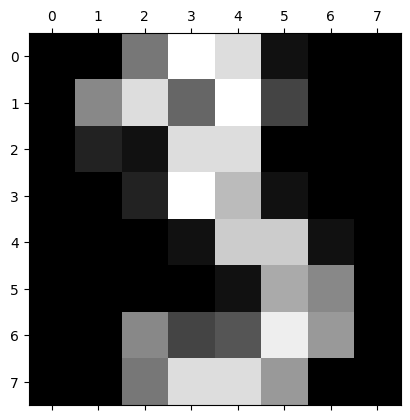

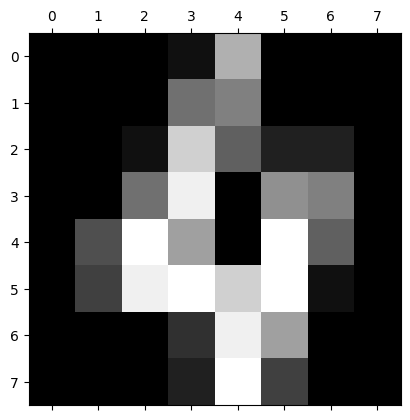

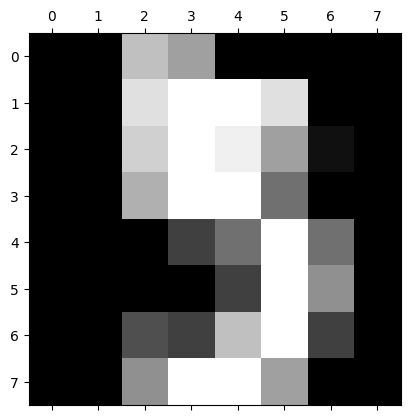

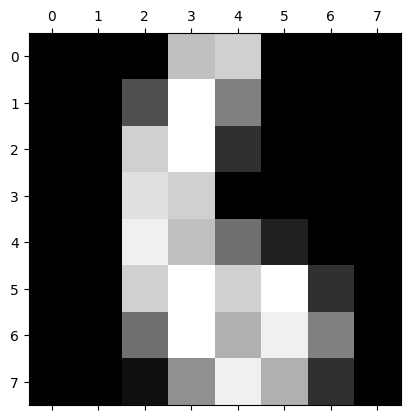

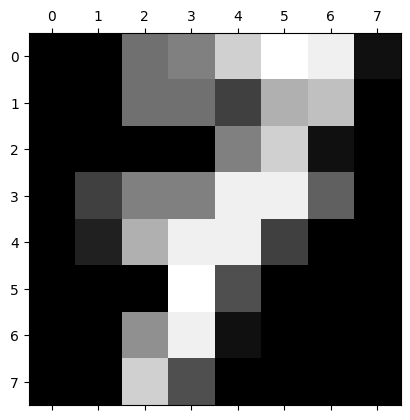

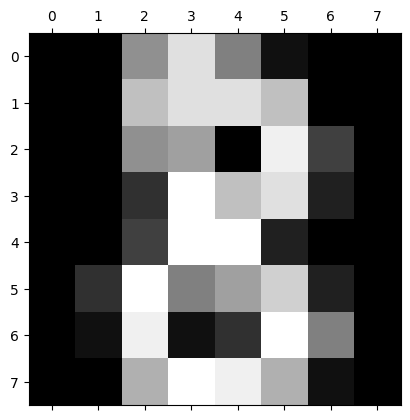

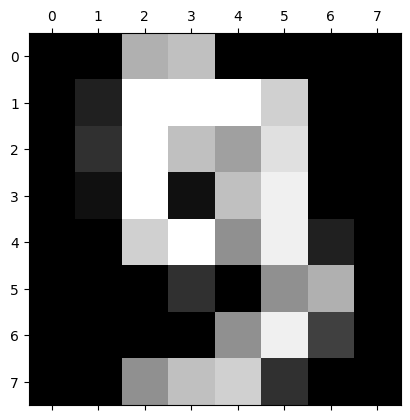

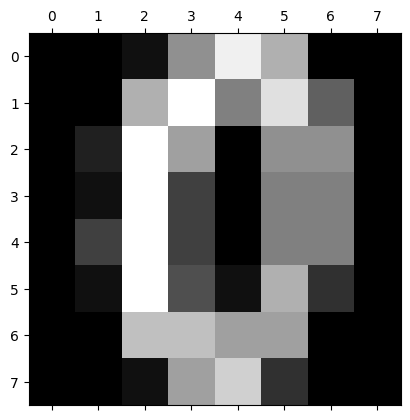

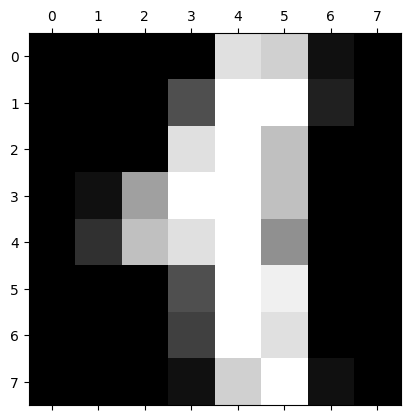

In [11]:
plt.gray()
for i in range (12):
    plt.matshow(digits.images[i])

In [12]:
digits.target[0:12] #shows which index has which digit's image

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.2) #Random fact: Overfitting occurs when model is trained too closely to the training dataset so that model doesn't give accurate predictions for values other than training dataset

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [18]:
model.fit(X_train,y_train)

C:\Users\dasgu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
model.score(X_test,y_test)

0.9638888888888889

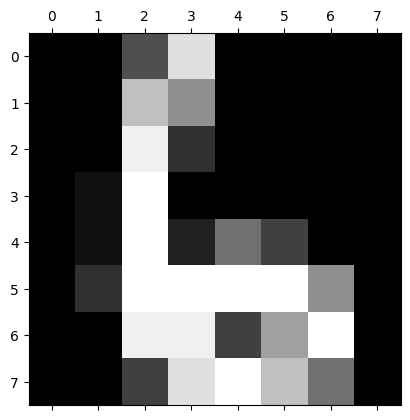

In [21]:
plt.matshow(digits.images[67]) #actual image

In [23]:
model.predict([digits.data[67]]) #predicted 

array([6])

In [27]:
y_predicted=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted) #y_test has the actual results vs y_predicted which has the predicted results. check for true and false positives and negatives
cm

array([[39,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 40,  1,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 44,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 29,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

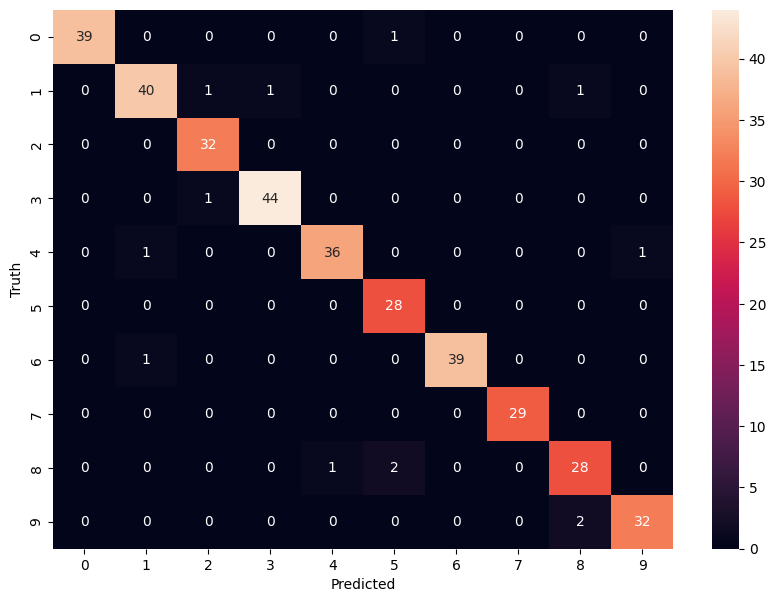

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel("Truth")
#look at 0 row. thirty nine 0's were truly predicted as 0's. But one 0 was predicted as 5.